<a href="https://colab.research.google.com/github/ELIZAIVAN/Machine-Learning-Projects/blob/master/Stroke_Imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Nmae: **Stroke Prediction**

Technique used :**Over sampling and Under sampling**

Algorithm used :**Naive Bayes,KNN,SVM**

**Importing the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('/content/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df1=df.copy()

In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [6]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [8]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [10]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

**Preprocessing for Modeling**

In [16]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['gender','ever_married','work_type','Residence_type','smoking_status']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [19]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

**Exploratory Data Analysis**

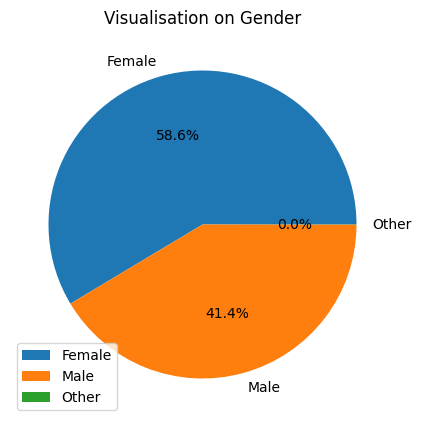

In [20]:
#GENDER
import matplotlib.pyplot as plt
y=df1['gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Female','Male','Other']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Visualisation on Gender')
plt.show()

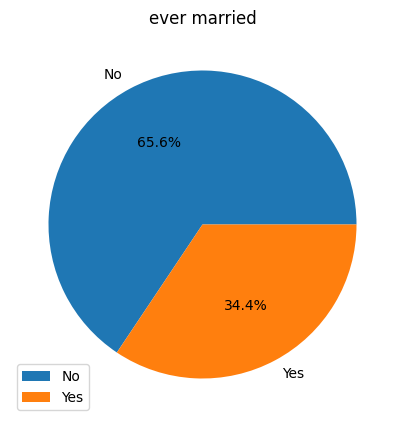

In [21]:
#ever married
import matplotlib.pyplot as plt
y=df1['ever_married'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('ever married')
plt.show()

<Axes: xlabel='work_type', ylabel='count'>

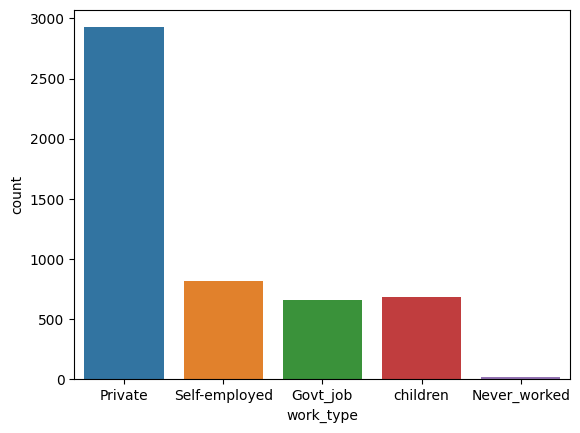

In [22]:
sns.countplot(x='work_type',data=df1)

<Axes: xlabel='Residence_type', ylabel='count'>

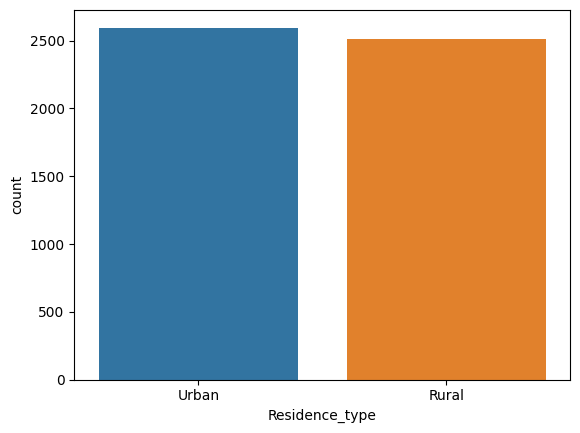

In [23]:
sns.countplot(x='Residence_type',data=df1)

<Axes: xlabel='smoking_status', ylabel='count'>

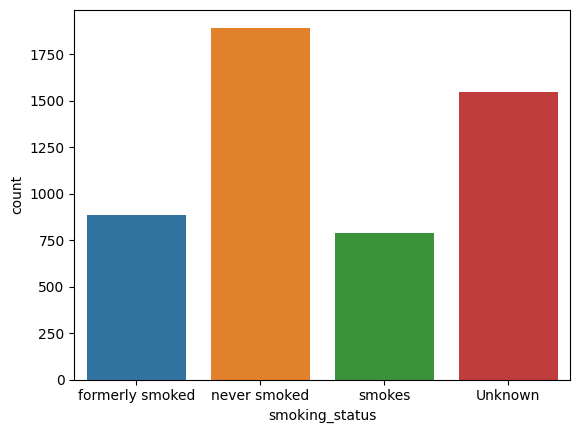

In [24]:
sns.countplot(x='smoking_status',data=df1)

In [ ]:
X=df.iloc[:,1:-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[ 1.17402064,  0.60884288, -0.33037446, ...,  0.63825752,
         0.01415834, -1.28066776],
       [-0.85177378, -1.88698872, -0.33037446, ..., -0.38666334,
        -1.76574421, -1.28066776],
       [ 1.17402064, -1.03666263, -0.33037446, ..., -0.46619632,
        -1.11136827,  0.58720118],
       ...,
       [-0.85177378, -0.54745829, -0.33037446, ..., -0.64701301,
         0.86484706,  0.58720118],
       [-0.85177378,  0.07516542, -0.33037446, ...,  2.46927368,
         3.4038257 ,  1.52113566],
       [-0.85177378,  1.09804722, -0.33037446, ...,  2.31460181,
         1.34908526, -1.28066776]])

**Model Building**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(3577, 10)

In [ ]:
y_train.shape

(3577,)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1450
           1       0.19      0.43      0.27        83

    accuracy                           0.87      1533
   macro avg       0.58      0.66      0.60      1533
weighted avg       0.92      0.87      0.89      1533



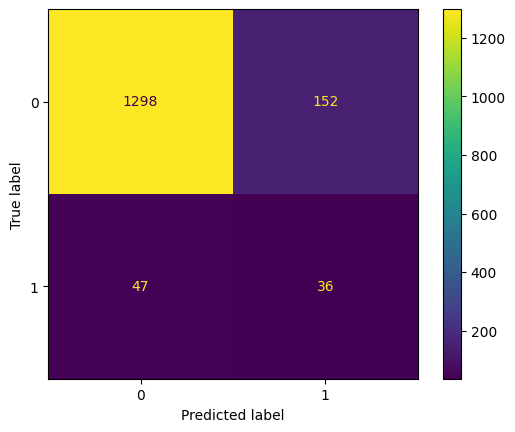

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))


**Knn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn


array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.92      1533



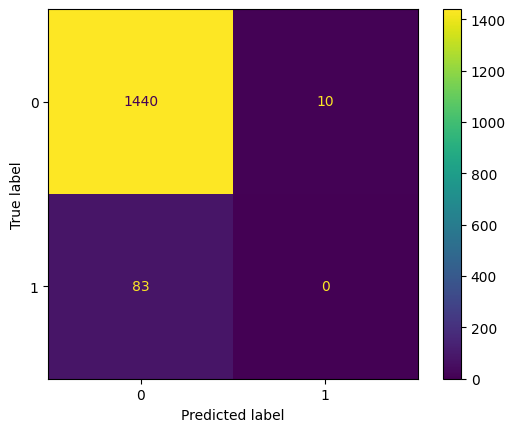

In [ ]:
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

**SVM**

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



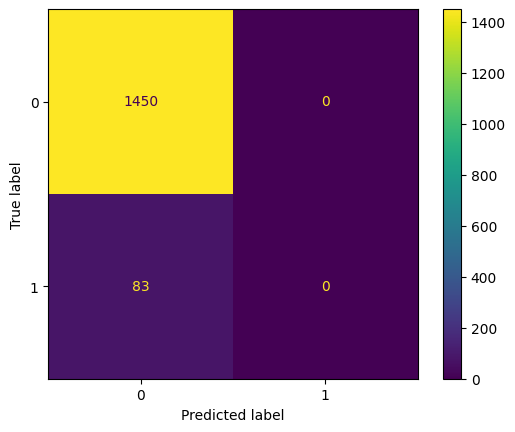

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

In [ ]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
y_train.value_counts()

0    3411
1     166
Name: stroke, dtype: int64

In [ ]:
#since its an imbalanced data lets use oversampling and undersampling
#oversampling
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_sm.value_counts()

0    3411
1    3411
Name: stroke, dtype: int64

In [ ]:
#using KNN
knn_sm=KNeighborsClassifier(n_neighbors=5)
knn_sm.fit(X_train_sm,y_train_sm)
y_pred_knn_sm=knn_sm.predict(X_test)
y_pred_knn_sm

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred_knn_sm))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1450
           1       0.14      0.55      0.23        83

    accuracy                           0.80      1533
   macro avg       0.56      0.68      0.55      1533
weighted avg       0.92      0.80      0.85      1533



In [ ]:
#Using svm
sv_sm=SVC()
sv_sm.fit(X_train,y_train)
y_pred_sv_sm=sv_sm.predict(X_test)
y_pred_sv_sm

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



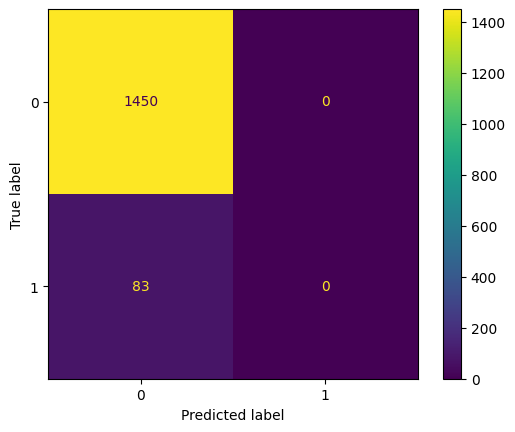

In [ ]:
print(classification_report(y_test,y_pred_sv_sm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv_sm))

In [ ]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
y_train.value_counts()

0    3411
1     166
Name: stroke, dtype: int64

In [ ]:
#using undersampling
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
y_train_us.value_counts()

0    166
1    166
Name: stroke, dtype: int64

In [ ]:
#using knn
from sklearn.neighbors import KNeighborsClassifier
knn_us=KNeighborsClassifier()
knn_us.fit(X_train_us,y_train_us)
y_pred_knn_us=knn_us.predict(X_test)
y_pred_knn_us

array([0, 1, 0, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1450
           1       0.13      0.83      0.22        83

    accuracy                           0.69      1533
   macro avg       0.56      0.75      0.51      1533
weighted avg       0.94      0.69      0.77      1533



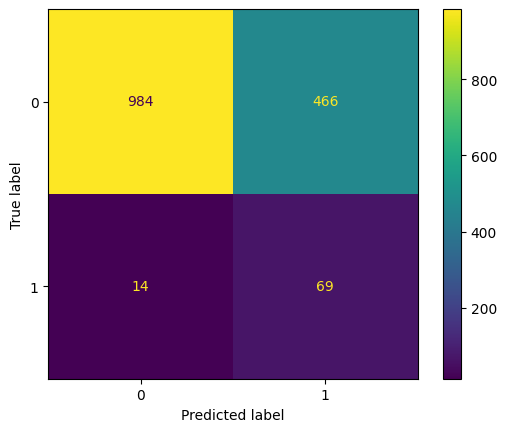

In [ ]:
print(classification_report(y_test,y_pred_knn_us))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn_us))

In [ ]:
#using svm
from sklearn.svm import SVC
sv_us=SVC()
sv_us.fit(X_train,y_train)
y_pred_sv_us=sv_us.predict(X_test)
y_pred_sv_us

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



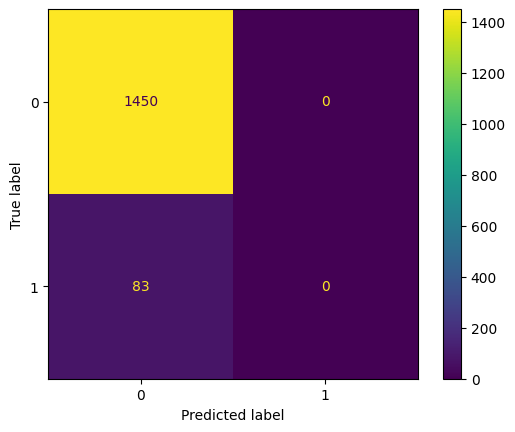

In [ ]:
print(classification_report(y_test,y_pred_sv_us))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv_us))

Conclusion: **SVM is the best fit model**